In [1]:
# Import dependencies
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import os
import pandas as pd
from pprint import pprint
import billboard
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from config import client_id, client_secret, redirect_uri

In [2]:
# Boiler plate code to authenticate Spotify API
os.environ['SPOTIPY_CLIENT_ID']= client_id
os.environ['SPOTIPY_CLIENT_SECRET']= client_secret
os.environ['SPOTIPY_REDIRECT_URI']= redirect_uri

In [5]:
hot_chart = billboard.ChartData('hot-100')
country_chart = billboard.ChartData('country-songs')
rap_chart = billboard.ChartData('rap-songs')

In [ ]:
chart[0]

In [6]:
def ChartMusic(chart):
    artists = []
    songs = []
    weeks=[]
    for song in chart:
        artists.append(song.artist)
        songs.append(song.title)
        weeks.append(song.weeks)
        
    return(artists, songs)

In [7]:
hot_artist = []
hot_songs =  []
country_artists=[]
country_songs=[]
rap_artists=[]
rap_songs=[]

hot_artist, hot_songs = ChartMusic(hot_chart)
country_artists, country_songs = ChartMusic(country_chart)
rap_artists, rap_songs = ChartMusic(rap_chart)

In [8]:
print(len(hot_artist))

100


In [9]:
artistname = []

for art in artist:
    if('Featuring' in art):
        art=art.split('Featuring')[0]
    if(',' in art):
        art=art.split(',')[0]
    if('&' in art):
        art=art.split('&')[0]
       
    if(art not in artistname):
        artistname.append(art.strip()) 
        
print(len(artistname))

NameError: name 'artist' is not defined

In [10]:
username='alex.stanley89@gmail.com'
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope)
if token:
   sp = spotipy.Spotify(auth=token)
else:
   print("Can't get token for", username)

In [11]:
artistid=[]
artistidname={}
for name in artistname[:40]:
    try:
        artid=sp.search(q=name)['tracks']['items'][0]['album']['artists'][0]['id']
        artistid.append(artid)
        artistidname[artid]=name
        
    except Exception:
        print('Skipping')

In [12]:
print(len(artistid))

0


In [10]:
# Get top 10 tracks for each artist in artist id

artist_track_ids = []
artist_song_names = []
artist_songpop = []
artist_name=[]

for ids in artistidname.keys():
    artistname=artistidname[ids]
    
    artist_top=sp.artist_top_tracks(artist_id=ids)['tracks']
    for song in artist_top:
        track_id = song['id']
        artist_name.append(artistname)
        track_name = song['name']
        popularity = song['popularity']
        artist_track_ids.append(track_id)
        artist_song_names.append(track_name)
        artist_songpop.append(popularity)
        
        print(f"Artist Name: {artistname}  Name: {track_name}|id: {track_id}|Popularity: {popularity}")

Artist Name: Maroon 5  Name: Girls Like You (feat. Cardi B)|id: 6V1bu6o1Yo5ZXnsCJU8Ovk|Popularity: 79
Artist Name: Maroon 5  Name: What Lovers Do (feat. SZA)|id: 2j5hsQvApottzvTn4pFJWF|Popularity: 78
Artist Name: Maroon 5  Name: She Will Be Loved - Radio Mix|id: 4llK75pXNWZz6KAho2Gp16|Popularity: 81
Artist Name: Maroon 5  Name: Sugar|id: 2iuZJX9X9P0GKaE93xcPjk|Popularity: 79
Artist Name: Maroon 5  Name: Maps|id: 4gbVRS8gloEluzf0GzDOFc|Popularity: 78
Artist Name: Maroon 5  Name: This Love|id: 6ECp64rv50XVz93WvxXMGF|Popularity: 78
Artist Name: Maroon 5  Name: Don't Wanna Know (feat. Kendrick Lamar)|id: 1nueTG77MzNkJTKQ0ZdGzT|Popularity: 73
Artist Name: Maroon 5  Name: Payphone|id: 1LmN9SSHISbtp9LoaR5ZVJ|Popularity: 71
Artist Name: Maroon 5  Name: Girls Like You|id: 6OEHjJJvdkk1Ln0p0AZdyz|Popularity: 72
Artist Name: Maroon 5  Name: Wait|id: 6AvfZXpbb6r35DfF7gHPRq|Popularity: 75
Artist Name: Lil Uzi Vert  Name: Lucid Dreams|id: 0s3nnoMeVWz3989MkNQiRf|Popularity: 97
Artist Name: Lil Uzi Ver

Artist Name: Tyga  Name: Taste (feat. Offset)|id: 5IaHrVsrferBYDm0bDyABy|Popularity: 96
Artist Name: Tyga  Name: SWISH|id: 55GiOwtxNajXVbpjjIzMnD|Popularity: 89
Artist Name: Tyga  Name: Dip|id: 2qfR91VvO7hRp4IajDT08h|Popularity: 77
Artist Name: Tyga  Name: Ayo|id: 0k6DnZMLoEUH8NGD5zh2SE|Popularity: 76
Artist Name: Tyga  Name: Ice Cream Man|id: 6ZA3Q8Dj5BrnmOsT300DCh|Popularity: 71
Artist Name: Tyga  Name: Leather in The Rain (feat. Kyndall)|id: 5lJAZ8IMBzfeWcV3PjCMMO|Popularity: 70
Artist Name: Tyga  Name: Sip A Lil (feat. Gucci Mane)|id: 6MPR32vGG1AaQMYOfqvyqx|Popularity: 68
Artist Name: Tyga  Name: Rack City|id: 0srwKuJPH8yBzzFUJMBQM2|Popularity: 68
Artist Name: Tyga  Name: Bitches N Marijuana|id: 3PiLfzEXHrvT1oJKR8PAJt|Popularity: 67
Artist Name: Tyga  Name: Swap Meet|id: 4bIFTZSKHZEMDUlEVF4ubu|Popularity: 67
Artist Name: Benny Blanco  Name: Eastside (with Halsey & Khalid)|id: 0d2iYfpKoM0QCKvcLCkBao|Popularity: 98
Artist Name: Benny Blanco  Name: Eastside (with Halsey & Khalid) - Ac

Artist Name: YG  Name: BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)|id: 0ZNrc4kNeQYD9koZ3KvCsy|Popularity: 88
Artist Name: YG  Name: That's My N**** (with Meek Mill, YG & Snoop Dogg)|id: 3i1B1PnsfnOQPGVIzhf1lr|Popularity: 74
Artist Name: YG  Name: HANDGUN (feat. A$AP Rocky)|id: 50wkDxcIfamIajKwmgp0iB|Popularity: 74
Artist Name: YG  Name: BULLETPROOF (feat. Jay 305)|id: 1qUdAB72nSWPZwDqH9KMYD|Popularity: 73
Artist Name: YG  Name: She Bad|id: 0CfmNX2TXk7yoJqHJiixnp|Popularity: 72
Artist Name: YG  Name: SUU WHOOP|id: 6JzvfFCIFT1CbbHE1pDNBU|Popularity: 72
Artist Name: YG  Name: POWER (feat. Ty Dolla $ign)|id: 4QL6NHf6sl3Sx58AFKc1GQ|Popularity: 72
Artist Name: YG  Name: TOO COCKY|id: 7GG1QIQ547taCwl1uLaTf5|Popularity: 70
Artist Name: YG  Name: 666 (feat. YoungBoy Never Broke Again)|id: 3R2fdTDtARC4xwKSG0rNWE|Popularity: 69
Artist Name: YG  Name: My Nigga|id: 02pf9lLM8Nb8l4u4ts1GWb|Popularity: 69
Artist Name: Taylor Swift  Name: Delicate|id: 6NFyWDv5CjfwuzoCkw47Xf|Popularity: 83
Artist N

Artist Name: Panic! At The Disco  Name: High Hopes|id: 1rqqCSm0Qe4I9rUvWncaom|Popularity: 91
Artist Name: Panic! At The Disco  Name: Say Amen (Saturday Night)|id: 76vMKwFtdDDCLcM6zXybjB|Popularity: 79
Artist Name: Panic! At The Disco  Name: Death Of A Bachelor|id: 1BECwm5qkaBwlbfo4kpYx8|Popularity: 78
Artist Name: Panic! At The Disco  Name: Hey Look Ma, I Made It|id: 22oEJW6r2rMb9z4IntfyEa|Popularity: 77
Artist Name: Panic! At The Disco  Name: This Is Gospel|id: 3yZQk5PC52CCmT4ZaTIKvv|Popularity: 76
Artist Name: Panic! At The Disco  Name: I Write Sins Not Tragedies|id: 4bPQs0PHn4xbipzdPfn6du|Popularity: 76
Artist Name: Panic! At The Disco  Name: Roaring 20s|id: 0wdV94AXGRphrbkDWLNzVC|Popularity: 76
Artist Name: Panic! At The Disco  Name: Emperor's New Clothes|id: 3px2rAPu74ltbkf9eZsZ8h|Popularity: 74
Artist Name: Panic! At The Disco  Name: King Of The Clouds|id: 50Hv5NZIM0puIUoBttjpfb|Popularity: 74
Artist Name: Panic! At The Disco  Name: Dying In LA|id: 18xmRkPWE0sGUzFyNNAAhN|Populari

In [13]:
pprint(sp.audio_features(tracks=artist_track_ids[0]))

NameError: name 'artist_track_ids' is not defined

In [14]:
# Get audio analysis for artists' top tracks

song_energies = []
song_loudness = []
danceabilities = []
song_valences = []

data_split = 150

for track_id in artist_track_ids[:data_split]:
    response = sp.audio_features(tracks=track_id)[0]
    song_energies.append(response['energy'])
    song_loudness.append(response['loudness'])
    danceabilities.append(response['danceability'])
    song_valences.append(response['valence'])
    
print(len(song_valences))

NameError: name 'artist_track_ids' is not defined

In [13]:
for track_id in artist_track_ids[data_split:]:
    response = sp.audio_features(tracks=track_id)[0]
    song_energies.append(response['energy'])
    song_loudness.append(response['loudness'])
    danceabilities.append(response['danceability'])
    song_valences.append(response['valence'])

In [14]:
print(len(song_valences))
print(len(artist_songpop))

309
309


In [15]:
songs_dict = {'Energy':song_energies,
            'Loudness':song_loudness,
            'Danceability':danceabilities,
            'Valence':song_valences,
            'Popularity':artist_songpop}

songs_df = pd.DataFrame(songs_dict)

songs_df.head()

,Energy,Loudness,Danceability,Valence,Popularity
0,0.541,-6.825,0.851,0.448,79
1,0.597,-5.131,0.799,0.419,78
2,0.667,-5.505,0.641,0.510,81
3,0.788,-7.055,0.748,0.884,79
4,0.713,-5.522,0.742,0.879,78


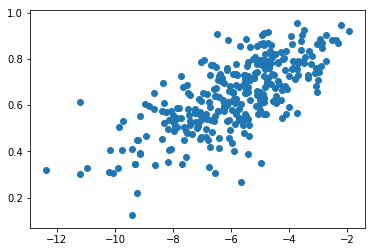

In [16]:
plt.scatter(x=songs_df['Loudness'],y=songs_df['Energy'])

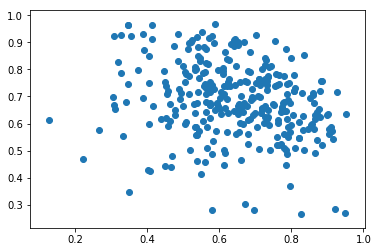

In [17]:
plt.scatter(x=songs_df['Energy'],y=songs_df['Danceability'])

Text(0, 0.5, 'Danceabiliity')

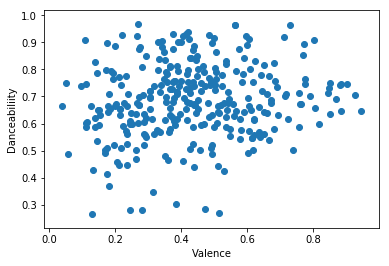

In [18]:
plt.scatter(x=songs_df['Valence'],y=songs_df['Danceability'])
plt.xlabel('Valence')
plt.ylabel("Danceabiliity")

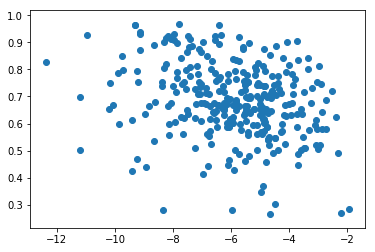

In [19]:
plt.scatter(x=songs_df['Loudness'],y=songs_df['Danceability'])

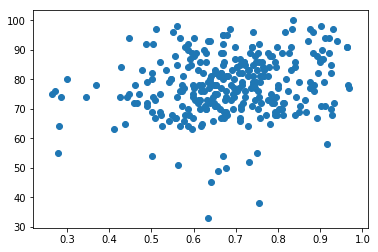

In [20]:
plt.scatter(x=songs_df['Danceability'],y=songs_df['Popularity'])

Text(0, 0.5, 'Popularity')

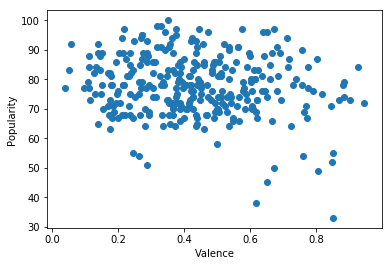

In [21]:
plt.scatter(x=songs_df['Valence'],y=songs_df['Popularity'])
plt.xlabel('Valence')
plt.ylabel("Popularity")

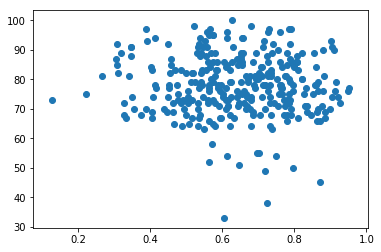

In [22]:
plt.scatter(x=songs_df['Energy'],y=songs_df['Popularity'])

In [25]:
# Get song audio analysis
pprint(sp.audio_features(tracks='26EnBklrc1wBUgsVZ0RG8C'))

[None]


In [26]:
pprint(top_songs[0:50])

['Girls Like You',
 'Lucid Dreams',
 'Better Now',
 'In My Feelings',
 'Killshot',
 'Sicko Mode',
 'I Like It',
 'FEFE',
 'I Love It',
 'Youngblood',
 'Taste',
 'Love Lies',
 'Falling Down',
 'Natural',
 'Happier',
 'Nonstop',
 'No Brainer',
 'Trip',
 'Back To You',
 'God Is A Woman',
 'Perfect',
 'Yes Indeed',
 "Boo'd Up",
 'New Patek',
 'Drip Too Hard',
 'Big Bank',
 'Eastside',
 'Lucky You',
 'Delicate',
 'Meant To Be',
 'Mo Bamba',
 'No Tears Left To Cry',
 'Sad!',
 'I Like Me Better',
 'Psycho',
 "I'm A Mess",
 'The Middle',
 'Wake Up In The Sky',
 'Nice For What',
 'Rap Devil',
 'Broken',
 'Simple',
 'Beautiful',
 'Tequila',
 "God's Plan",
 'High Hopes',
 'No Stylist',
 'She Got The Best Of Me',
 'Ring',
 'Hotel Key']


In [16]:
top_song_id = []
for song_name in hot_songs:
    song_id=sp.search(q=song_name, type='track')['tracks']['items'][0]['id']
    top_song_id.append(song_id)
    
pprint(top_song_id)

['6FRLCMO5TUHTexlWo8ym1W',
 '0s3nnoMeVWz3989MkNQiRf',
 '7dt6x5M1jzdTEt8oCbisTK',
 '2G7V7zsVDxg1yRsu7Ew9RJ',
 '1jo3TwNGCXfNdB5uba3ZVv',
 '2xLMifQCjDGFmkHkpNLD9h',
 '58q2HKrzhC3ozto2nDdN4z',
 '2E124GmJRnBJuXbTb4cPUB',
 '4S8d14HvHb70ImctNgVzQQ',
 '55S2PQgSMYAhgoTCcGCDfw',
 '5IaHrVsrferBYDm0bDyABy',
 '45Egmo7icyopuzJN0oMEdk',
 '0Dn40gxVCMo5TkgS8Ik18Q',
 '4zIO3ilp5HvTeK3HJHxhMP',
 '2dpaYNEQHiRxtZbfNsse99',
 '0TlLq3lA83rQOYtrqBqSct',
 '5WvAo7DNuPRmk4APhdPzi8',
 '7noud145AHZGg74vpWOsCa',
 '4hQ6UGyWQIGJmHSo0J88JW',
 '5OCJzvD7sykQEKHH7qAC3C',
 '4E3qImtJzRqLt8ZZyLceOE',
 '6vN77lE9LK6HP2DewaN6HZ',
 '0At2qAoaVjIwWNAqrscXli',
 '0Fpen1PTuEnCmOJtUU9Iud',
 '1BxkZE73h9BN3qwuA15TA3',
 '0ZNrc4kNeQYD9koZ3KvCsy',
 '0d2iYfpKoM0QCKvcLCkBao',
 '60SdxE8apGAxMiRrpbmLY0',
 '6NFyWDv5CjfwuzoCkw47Xf',
 '7iDa6hUg2VgEL1o1HjmfBn',
 '3QybPutx0Tjk472bBKjNWn',
 '2qT1uLXPVPzGgFOx4jtEuo',
 '3ee8Jmje8o58CHK66QrVC2',
 '1wjzFQodRWrPcQ0AnYnvQ9',
 '3swc6WTsr7rl9DqQKQA55C',
 '04ZTP5KsCypmtCmQg5tH9R',
 '09IStsImFySgyp0pIQdqAc',
 

In [18]:
top_songs_df = pd.DataFrame(top_song_id)
top_songs_df.to_csv('top_songs.csv')

In [24]:
# Simpler and faster to make a liist of JSON dctionaries and turn that into a pandas dataframe
hot_features_list = []
popularity = []

for track_id in top_song_id:
    features = sp.audio_features(tracks=track_id)[0]
    track_info = sp.track(track_id)['popularity']
    hot_features_list.append(features)
    popularity.append(track_info)

# hot_track_df = pd.DataFrame(hot_track_info_list)
hot_df = pd.DataFrame(hot_features_list)
# hot_df['Popularity'] = popularity
print(len(hot_df['valence']))
print(len(popularity))

100
100


In [25]:
hot_df['Popularity'] = popularity

In [26]:
hot_df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Popularity
0,0.5680,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,235545,0.541,6FRLCMO5TUHTexlWo8ym1W,0.00000,0,0.130,-6.825,1,0.0505,124.959,4,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.448,94
1,0.3490,https://api.spotify.com/v1/audio-analysis/0s3n...,0.511,239836,0.566,0s3nnoMeVWz3989MkNQiRf,0.00000,6,0.340,-7.230,0,0.2000,83.903,4,https://api.spotify.com/v1/tracks/0s3nnoMeVWz3...,audio_features,spotify:track:0s3nnoMeVWz3989MkNQiRf,0.218,97
2,0.3540,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267,0.563,7dt6x5M1jzdTEt8oCbisTK,0.00000,10,0.136,-5.843,1,0.0454,145.028,4,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.374,95
3,0.0589,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.00006,1,0.396,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.350,100
4,0.0989,https://api.spotify.com/v1/audio-analysis/1jo3...,0.892,253580,0.651,1jo3TwNGCXfNdB5uba3ZVv,0.00000,0,0.371,-8.645,0,0.3780,105.814,4,https://api.spotify.com/v1/tracks/1jo3TwNGCXfN...,audio_features,spotify:track:1jo3TwNGCXfNdB5uba3ZVv,0.599,88


In [27]:
hot_df.to_csv('hot_100_features.csv')

In [28]:
slow_df = hot_df[hot_df['tempo']<= 120]
fast_df = hot_df[hot_df['tempo']> 120]

print(max(hot_df['tempo']))
print(min(hot_df['tempo']))

203.911
72.989


In [33]:
print(len(slow_df))
print(len(fast_df))

slow_df.head(100)

49
51


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Popularity
1,0.34900,https://api.spotify.com/v1/audio-analysis/0s3n...,0.511,239836,0.566,0s3nnoMeVWz3989MkNQiRf,0.000000,6,0.3400,-7.230,0,0.2000,83.903,4,https://api.spotify.com/v1/tracks/0s3nnoMeVWz3...,audio_features,spotify:track:0s3nnoMeVWz3989MkNQiRf,0.2180,97
3,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.3500,100
4,0.09890,https://api.spotify.com/v1/audio-analysis/1jo3...,0.892,253580,0.651,1jo3TwNGCXfNdB5uba3ZVv,0.000000,0,0.3710,-8.645,0,0.3780,105.814,4,https://api.spotify.com/v1/tracks/1jo3TwNGCXfN...,audio_features,spotify:track:1jo3TwNGCXfNdB5uba3ZVv,0.5990,88
8,0.01140,https://api.spotify.com/v1/audio-analysis/4S8d...,0.901,127947,0.522,4S8d14HvHb70ImctNgVzQQ,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,https://api.spotify.com/v1/tracks/4S8d14HvHb70...,audio_features,spotify:track:4S8d14HvHb70ImctNgVzQQ,0.3290,98
10,0.02360,https://api.spotify.com/v1/audio-analysis/5IaH...,0.884,232959,0.559,5IaHrVsrferBYDm0bDyABy,0.000000,0,0.1010,-7.442,1,0.1200,97.994,4,https://api.spotify.com/v1/tracks/5IaHrVsrferB...,audio_features,spotify:track:5IaHrVsrferBYDm0bDyABy,0.3420,96
13,0.21600,https://api.spotify.com/v1/audio-analysis/4zIO...,0.448,189467,0.612,4zIO3ilp5HvTeK3HJHxhMP,0.000000,2,0.0800,-6.106,1,0.0708,97.773,4,https://api.spotify.com/v1/tracks/4zIO3ilp5HvT...,audio_features,spotify:track:4zIO3ilp5HvTeK3HJHxhMP,0.2130,94
14,0.19100,https://api.spotify.com/v1/audio-analysis/2dpa...,0.687,214290,0.792,2dpaYNEQHiRxtZbfNsse99,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,audio_features,spotify:track:2dpaYNEQHiRxtZbfNsse99,0.6710,97
17,0.21400,https://api.spotify.com/v1/audio-analysis/7nou...,0.717,217118,0.605,7noud145AHZGg74vpWOsCa,0.000000,11,0.1380,-5.680,0,0.0750,81.047,4,https://api.spotify.com/v1/tracks/7noud145AHZG...,audio_features,spotify:track:7noud145AHZGg74vpWOsCa,0.3870,86
18,0.09450,https://api.spotify.com/v1/audio-analysis/4hQ6...,0.601,207905,0.724,4hQ6UGyWQIGJmHSo0J88JW,0.000002,6,0.1200,-4.856,1,0.0486,102.061,4,https://api.spotify.com/v1/tracks/4hQ6UGyWQIGJ...,audio_features,spotify:track:4hQ6UGyWQIGJmHSo0J88JW,0.5080,88
21,0.03500,https://api.spotify.com/v1/audio-analysis/6vN7...,0.964,142273,0.346,6vN77lE9LK6HP2DewaN6HZ,0.000000,5,0.1080,-9.309,0,0.5300,119.958,4,https://api.spotify.com/v1/tracks/6vN77lE9LK6H...,audio_features,spotify:track:6vN77lE9LK6HP2DewaN6HZ,0.5620,91


In [30]:
stats.ttest_ind(slow_df['Popularity'], fast_df['Popularity'])

Ttest_indResult(statistic=0.6799711409067529, pvalue=0.498125872852335)

In [36]:
happy_df = hot_df[hot_df['valence']>=0.5]
sad_df = hot_df[hot_df['valence']<=0.5]

print(len(happy_df))
print(len(sad_df))

36
64


In [35]:
stats.ttest_ind(happy_df['Popularity'], sad_df['Popularity'])

Ttest_indResult(statistic=-1.8289807981089075, pvalue=0.0704436394626824)

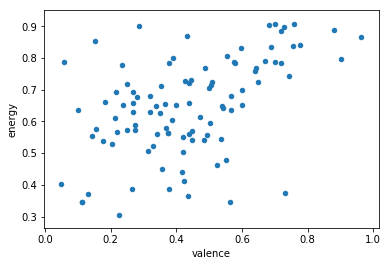

In [24]:
hot_df.plot("valence", "energy", kind='scatter')

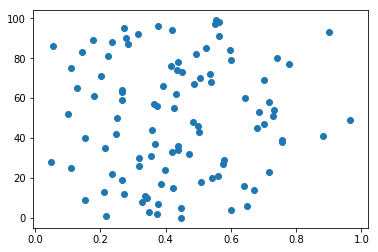

In [25]:
plt.scatter(hot_df['valence'], hot_df.index)

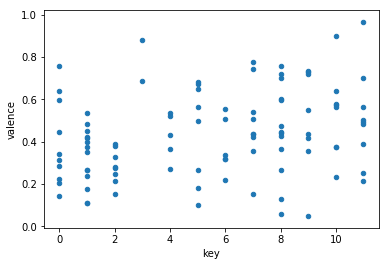

In [26]:
hot_df.plot("key", "valence", kind='scatter')

In [27]:
top_keys = hot_df.groupby('key').mean()
top_keys.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
key,,,,,,,,,,,,
0,0.249970,0.733500,222644.000000,0.614900,0.000034,0.151510,-6.431700,0.900000,0.171400,130.931100,4.100,0.395600
1,0.130789,0.728214,223110.785714,0.517286,0.000142,0.191643,-7.276143,0.857143,0.192671,137.370643,4.000,0.328857
2,0.160050,0.612750,204750.125000,0.659750,0.000004,0.126150,-5.825625,0.875000,0.133625,109.056125,4.125,0.283500
3,0.229400,0.561000,200480.000000,0.861500,0.000000,0.097300,-3.285500,0.500000,0.072050,163.837000,4.000,0.784000
4,0.160544,0.690000,198880.600000,0.626600,0.000588,0.194140,-6.879200,0.200000,0.067480,128.597400,4.000,0.426800


<BarContainer object of 12 artists>

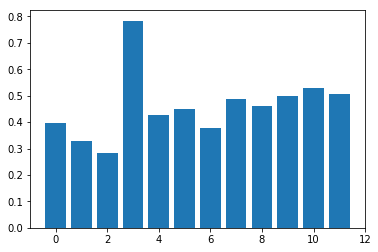

In [28]:
plt.bar(top_keys.index, top_keys.valence)

In [29]:
major_df = hot_df[hot_df['mode']==1]
# major_df = major_df.groupby('key').mean()
major_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.56800,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,235545,0.541,6FRLCMO5TUHTexlWo8ym1W,0.000000,0,0.1300,-6.825,1,0.0505,124.959,4,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.4480
2,0.35400,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267,0.563,7dt6x5M1jzdTEt8oCbisTK,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.3740
3,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.3500
5,0.00513,https://api.spotify.com/v1/audio-analysis/2xLM...,0.834,312820,0.730,2xLMifQCjDGFmkHkpNLD9h,0.000000,8,0.1240,-3.714,1,0.2220,155.008,4,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,0.4460
7,0.08800,https://api.spotify.com/v1/audio-analysis/2E12...,0.931,179405,0.387,2E124GmJRnBJuXbTb4cPUB,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,https://api.spotify.com/v1/tracks/2E124GmJRnBJ...,audio_features,spotify:track:2E124GmJRnBJuXbTb4cPUB,0.3760
8,0.01140,https://api.spotify.com/v1/audio-analysis/4S8d...,0.901,127947,0.522,4S8d14HvHb70ImctNgVzQQ,0.000000,2,0.2590,-8.304,1,0.3300,104.053,4,https://api.spotify.com/v1/tracks/4S8d14HvHb70...,audio_features,spotify:track:4S8d14HvHb70ImctNgVzQQ,0.3290
10,0.02360,https://api.spotify.com/v1/audio-analysis/5IaH...,0.884,232959,0.559,5IaHrVsrferBYDm0bDyABy,0.000000,0,0.1010,-7.442,1,0.1200,97.994,4,https://api.spotify.com/v1/tracks/5IaHrVsrferB...,audio_features,spotify:track:5IaHrVsrferBYDm0bDyABy,0.3420
11,0.09560,https://api.spotify.com/v1/audio-analysis/45Eg...,0.708,201707,0.648,45Egmo7icyopuzJN0oMEdk,0.000000,6,0.1340,-5.626,1,0.0449,143.955,4,https://api.spotify.com/v1/tracks/45Egmo7icyop...,audio_features,spotify:track:45Egmo7icyopuzJN0oMEdk,0.3380
13,0.21600,https://api.spotify.com/v1/audio-analysis/4zIO...,0.448,189467,0.612,4zIO3ilp5HvTeK3HJHxhMP,0.000000,2,0.0800,-6.106,1,0.0708,97.773,4,https://api.spotify.com/v1/tracks/4zIO3ilp5HvT...,audio_features,spotify:track:4zIO3ilp5HvTeK3HJHxhMP,0.2130
14,0.19100,https://api.spotify.com/v1/audio-analysis/2dpa...,0.687,214290,0.792,2dpaYNEQHiRxtZbfNsse99,0.000000,5,0.1670,-2.749,1,0.0452,100.015,4,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,audio_features,spotify:track:2dpaYNEQHiRxtZbfNsse99,0.6710


<BarContainer object of 70 artists>

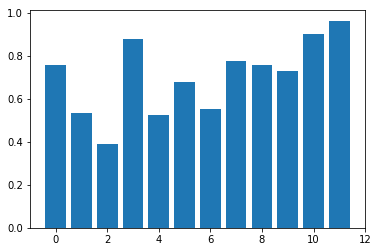

In [30]:
plt.bar(major_df['key'], major_df['valence'])

In [31]:
Cmaj = major_df[major_df['key']==0]
# Csharp

key_data=[]
for key in range(0,12):
    key_df = major_df[major_df['key']==key]
    key_data.append(key_df['valence'])


In [32]:
print(key_data)

[0     0.448
10    0.342
16    0.639
39    0.756
71    0.203
81    0.224
83    0.144
87    0.286
92    0.315
Name: valence, dtype: float64, 3     0.350
7     0.376
19    0.268
25    0.112
59    0.266
72    0.535
73    0.449
75    0.112
76    0.418
88    0.237
89    0.177
94    0.420
Name: valence, dtype: float64, 8     0.329
13    0.213
42    0.249
66    0.391
90    0.280
95    0.274
96    0.378
Name: valence, dtype: float64, 41    0.881
Name: valence, dtype: float64, 85    0.523
Name: valence, dtype: float64, 14    0.671
45    0.681
52    0.100
61    0.182
63    0.268
Name: valence, dtype: float64, 11    0.338
18    0.508
99    0.555
Name: valence, dtype: float64, 15    0.422
20    0.542
36    0.437
44    0.357
70    0.507
74    0.436
77    0.778
80    0.742
Name: valence, dtype: float64, 5     0.4460
32    0.4730
34    0.4390
38    0.7570
55    0.4270
57    0.3640
64    0.2670
79    0.6000
84    0.5960
86    0.0564
Name: valence, dtype: float64, 33    0.419
51    0.728
54    0.732
58

In [33]:
stats.f_oneway(key_data[0],key_data[-1])

F_onewayResult(statistic=4.958488251303191, pvalue=0.04587688112640743)

In [18]:
song_test = 'I wanna dance with somebody (who loves me)'

i_wanna_dance_id = sp.search(song_test)['tracks']['items'][0]['id']

pprint(i_wanna_dance_id)

whitney_analysis = sp.audio_analysis(i_wanna_dance_id)

'2tUBqZG2AbRi7Q0BIrVrEj'


In [19]:
pprint(whitney_analysis)

{'bars': [{'confidence': 0.065, 'duration': 1.99431, 'start': 0.70307},
          {'confidence': 0.686, 'duration': 2.01989, 'start': 2.69738},
          {'confidence': 0.63, 'duration': 2.01885, 'start': 4.71727},
          {'confidence': 0.635, 'duration': 2.02171, 'start': 6.73612},
          {'confidence': 0.543, 'duration': 2.01641, 'start': 8.75782},
          {'confidence': 0.58, 'duration': 2.01753, 'start': 10.77423},
          {'confidence': 0.712, 'duration': 2.02408, 'start': 12.79177},
          {'confidence': 0.354, 'duration': 2.02123, 'start': 14.81584},
          {'confidence': 0.698, 'duration': 2.01894, 'start': 16.83708},
          {'confidence': 0.837, 'duration': 2.01839, 'start': 18.85601},
          {'confidence': 0.865, 'duration': 2.01804, 'start': 20.8744},
          {'confidence': 0.188, 'duration': 2.02294, 'start': 22.89244},
          {'confidence': 0.858, 'duration': 2.01762, 'start': 24.91538},
          {'confidence': 0.457, 'duration': 2.01876, 'start

               'start': 2.81619,
               'timbre': [34.357,
                          82.497,
                          45.67,
                          170.065,
                          68.286,
                          -95.108,
                          37.071,
                          25.216,
                          48.389,
                          9.029,
                          -61.213,
                          -21.803]},
              {'confidence': 1.0,
               'duration': 0.26118,
               'loudness_max': -8.859,
               'loudness_max_time': 0.01701,
               'loudness_start': -45.587,
               'pitches': [0.632,
                           1.0,
                           0.685,
                           0.079,
                           0.092,
                           0.274,
                           0.22,
                           0.46,
                           0.301,
                           0.15,
                        

               'loudness_start': -8.32,
               'pitches': [0.612,
                           0.729,
                           0.522,
                           0.416,
                           0.549,
                           0.948,
                           0.927,
                           0.82,
                           0.704,
                           0.764,
                           1.0,
                           0.893],
               'start': 12.21923,
               'timbre': [54.054,
                          63.659,
                          29.325,
                          -0.329,
                          53.908,
                          -31.19,
                          26.641,
                          53.376,
                          14.662,
                          10.838,
                          -14.384,
                          -1.643]},
              {'confidence': 0.032,
               'duration': 0.11642,
               'loudness_max': -8.561

                          -22.152,
                          -26.285,
                          -26.098,
                          6.843,
                          26.498,
                          -6.131,
                          -33.54]},
              {'confidence': 0.65,
               'duration': 0.09388,
               'loudness_max': -3.958,
               'loudness_max_time': 0.03088,
               'loudness_start': -10.867,
               'pitches': [1.0,
                           0.834,
                           0.069,
                           0.116,
                           0.165,
                           0.232,
                           0.568,
                           0.346,
                           0.623,
                           0.617,
                           0.884,
                           0.125],
               'start': 24.89701,
               'timbre': [53.641,
                          79.202,
                          24.882,
                  

                           0.343,
                           1.0,
                           0.193,
                           0.107,
                           0.055,
                           0.206,
                           0.06],
               'start': 37.77297,
               'timbre': [46.197,
                          58.363,
                          -22.72,
                          -4.97,
                          33.856,
                          -38.273,
                          -67.361,
                          14.853,
                          2.104,
                          19.003,
                          -30.493,
                          -4.712]},
              {'confidence': 0.986,
               'duration': 0.18054,
               'loudness_max': -7.717,
               'loudness_max_time': 0.11204,
               'loudness_start': -26.616,
               'pitches': [0.024,
                           0.08,
                           0.025,
                    

              {'confidence': 0.328,
               'duration': 0.24444,
               'loudness_max': -6.388,
               'loudness_max_time': 0.05944,
               'loudness_start': -9.835,
               'pitches': [0.524,
                           0.218,
                           0.142,
                           0.147,
                           0.193,
                           0.507,
                           0.195,
                           0.13,
                           0.138,
                           0.1,
                           0.347,
                           1.0],
               'start': 50.60222,
               'timbre': [51.07,
                          140.685,
                          27.221,
                          -4.551,
                          -2.067,
                          -25.342,
                          8.986,
                          14.058,
                          8.239,
                          8.188,
                          -

               'start': 63.26853,
               'timbre': [49.84,
                          132.245,
                          16.18,
                          -30.174,
                          22.594,
                          -39.156,
                          6.273,
                          3.409,
                          1.337,
                          -0.324,
                          1.346,
                          4.82]},
              {'confidence': 0.233,
               'duration': 0.11052,
               'loudness_max': -9.84,
               'loudness_max_time': 0.0431,
               'loudness_start': -12.975,
               'pitches': [0.217,
                           0.651,
                           0.354,
                           0.248,
                           0.459,
                           0.587,
                           1.0,
                           0.665,
                           0.564,
                           0.496,
                           

               'loudness_start': -18.436,
               'pitches': [0.404,
                           0.322,
                           0.148,
                           0.044,
                           0.03,
                           0.072,
                           0.294,
                           0.105,
                           0.072,
                           0.063,
                           0.104,
                           1.0],
               'start': 77.4039,
               'timbre': [52.022,
                          90.042,
                          41.949,
                          21.86,
                          17.17,
                          -26.044,
                          52.69,
                          16.89,
                          -5.233,
                          21.487,
                          8.006,
                          2.355]},
              {'confidence': 0.017,
               'duration': 0.1161,
               'loudness_max': -8.91,
     

               'timbre': [51.037,
                          125.518,
                          96.059,
                          15.129,
                          50.704,
                          16.599,
                          49.361,
                          0.07,
                          11.626,
                          17.243,
                          17.835,
                          -15.205]},
              {'confidence': 0.201,
               'duration': 0.3829,
               'loudness_max': -7.129,
               'loudness_max_time': 0.01028,
               'loudness_start': -10.047,
               'pitches': [0.206,
                           0.371,
                           0.335,
                           1.0,
                           0.262,
                           0.255,
                           0.283,
                           0.332,
                           0.441,
                           0.338,
                           0.906,
                     

                           0.638,
                           0.131,
                           0.139,
                           0.52,
                           0.285,
                           0.137,
                           0.17,
                           0.138,
                           0.103,
                           0.158],
               'start': 102.14522,
               'timbre': [46.551,
                          115.14,
                          -80.585,
                          24.737,
                          63.443,
                          -61.555,
                          -17.689,
                          33.151,
                          24.099,
                          -2.342,
                          -23.932,
                          6.242]},
              {'confidence': 0.756,
               'duration': 0.10458,
               'loudness_max': -12.143,
               'loudness_max_time': 0.023,
               'loudness_start': -21.966,
               '

               'loudness_max': -14.498,
               'loudness_max_time': 0.03658,
               'loudness_start': -18.532,
               'pitches': [0.037,
                           0.098,
                           0.133,
                           0.699,
                           1.0,
                           0.05,
                           0.013,
                           0.041,
                           0.024,
                           0.028,
                           0.087,
                           0.057],
               'start': 113.98735,
               'timbre': [42.849,
                          -21.476,
                          -46.217,
                          -17.822,
                          137.016,
                          -31.536,
                          -8.763,
                          0.022,
                          -5.915,
                          -16.727,
                          -18.502,
                          12.819]},
              {'

                           0.174,
                           0.067,
                           0.056,
                           0.079,
                           1.0],
               'start': 128.40603,
               'timbre': [50.591,
                          48.311,
                          1.749,
                          -22.456,
                          49.356,
                          -70.415,
                          18.096,
                          9.18,
                          21.513,
                          17.141,
                          -21.89,
                          -7.253]},
              {'confidence': 0.286,
               'duration': 0.52181,
               'loudness_max': -8.045,
               'loudness_max_time': 0.03057,
               'loudness_start': -11.902,
               'pitches': [0.358,
                           1.0,
                           0.384,
                           0.207,
                           0.15,
                      

              {'confidence': 0.567,
               'duration': 0.09288,
               'loudness_max': -15.846,
               'loudness_max_time': 0.00915,
               'loudness_start': -21.358,
               'pitches': [0.133,
                           0.871,
                           0.284,
                           0.542,
                           0.118,
                           0.313,
                           0.945,
                           0.349,
                           1.0,
                           0.21,
                           0.234,
                           0.282],
               'start': 143.44122,
               'timbre': [40.934,
                          142.013,
                          22.299,
                          18.549,
                          157.422,
                          -86.247,
                          -5.366,
                          19.55,
                          -25.278,
                          -16.812,
                

               'timbre': [48.401,
                          26.573,
                          39.846,
                          -24.136,
                          96.639,
                          -14.78,
                          -47.106,
                          -18.76,
                          3.333,
                          27.559,
                          -5.864,
                          -24.294]},
              {'confidence': 0.472,
               'duration': 0.21469,
               'loudness_max': -8.172,
               'loudness_max_time': 0.01469,
               'loudness_start': -12.908,
               'pitches': [0.295,
                           1.0,
                           0.547,
                           0.026,
                           0.028,
                           0.117,
                           0.181,
                           0.115,
                           0.108,
                           0.057,
                           0.106,
                  

              {'confidence': 1.0,
               'duration': 0.37737,
               'loudness_max': -9.87,
               'loudness_max_time': 0.01857,
               'loudness_start': -31.429,
               'pitches': [0.206,
                           1.0,
                           0.269,
                           0.065,
                           0.048,
                           0.137,
                           0.101,
                           0.137,
                           0.287,
                           0.1,
                           0.125,
                           0.092],
               'start': 166.2722,
               'timbre': [43.773,
                          86.631,
                          -68.972,
                          47.514,
                          39.55,
                          -50.991,
                          -12.55,
                          3.187,
                          -10.155,
                          10.251,
                         

                          -29.159,
                          -4.849,
                          -14.106,
                          11.352,
                          8.856,
                          -25.07,
                          30.902]},
              {'confidence': 0.648,
               'duration': 0.51079,
               'loudness_max': -5.019,
               'loudness_max_time': 0.05405,
               'loudness_start': -11.155,
               'pitches': [0.178,
                           0.133,
                           0.245,
                           0.278,
                           0.209,
                           0.336,
                           0.227,
                           0.085,
                           0.173,
                           0.293,
                           1.0,
                           0.752],
               'start': 177.88798,
               'timbre': [53.055,
                          101.456,
                          35.497,
                

                           0.29,
                           0.251,
                           0.371,
                           0.587,
                           0.31,
                           0.254,
                           0.408],
               'start': 191.87791,
               'timbre': [53.868,
                          128.855,
                          80.104,
                          -2.704,
                          31.393,
                          -30.517,
                          71.155,
                          18.92,
                          -15.01,
                          -8.213,
                          -1.322,
                          50.904]},
              {'confidence': 0.531,
               'duration': 0.32481,
               'loudness_max': -0.54,
               'loudness_max_time': 0.08846,
               'loudness_start': -5.99,
               'pitches': [0.266,
                           0.362,
                           0.225,
                    

              {'confidence': 0.464,
               'duration': 0.24961,
               'loudness_max': -9.042,
               'loudness_max_time': 0.04347,
               'loudness_start': -14.393,
               'pitches': [0.391,
                           0.248,
                           0.283,
                           0.364,
                           0.259,
                           0.413,
                           0.244,
                           0.23,
                           0.218,
                           0.398,
                           1.0,
                           0.37],
               'start': 203.90036,
               'timbre': [48.871,
                          85.991,
                          68.765,
                          28.952,
                          44.763,
                          -31.705,
                          44.274,
                          27.405,
                          -12.182,
                          25.488,
                    

                           0.57,
                           0.198],
               'start': 219.04009,
               'timbre': [40.064,
                          98.852,
                          -7.308,
                          15.436,
                          62.619,
                          -39.878,
                          8.623,
                          5.901,
                          -31.808,
                          -16.218,
                          -18.404,
                          -6.019]},
              {'confidence': 0.901,
               'duration': 0.12816,
               'loudness_max': -11.777,
               'loudness_max_time': 0.02338,
               'loudness_start': -25.553,
               'pitches': [1.0,
                           0.819,
                           0.081,
                           0.1,
                           0.155,
                           0.241,
                           0.304,
                           0.295,
                  

               'pitches': [0.058,
                           0.062,
                           0.064,
                           0.054,
                           0.092,
                           0.317,
                           0.405,
                           0.446,
                           1.0,
                           0.194,
                           0.124,
                           0.078],
               'start': 231.02113,
               'timbre': [45.007,
                          43.05,
                          -38.867,
                          23.214,
                          46.036,
                          -34.212,
                          3.538,
                          26.792,
                          -2.654,
                          11.569,
                          2.954,
                          -0.24]},
              {'confidence': 0.564,
               'duration': 0.12136,
               'loudness_max': -12.099,
               'loudness_max_time': 0.

               'loudness_max_time': 0.04719,
               'loudness_start': -14.235,
               'pitches': [0.374,
                           0.29,
                           0.364,
                           0.333,
                           0.268,
                           0.327,
                           0.421,
                           0.824,
                           1.0,
                           0.337,
                           0.35,
                           0.398],
               'start': 244.14032,
               'timbre': [51.775,
                          98.908,
                          72.13,
                          29.023,
                          39.969,
                          -5.596,
                          17.837,
                          20.324,
                          28.583,
                          18.146,
                          -26.906,
                          -23.477]},
              {'confidence': 0.695,
               'duration':

               'pitches': [1.0,
                           0.305,
                           0.115,
                           0.131,
                           0.194,
                           0.349,
                           0.203,
                           0.13,
                           0.151,
                           0.099,
                           0.112,
                           0.356],
               'start': 255.6459,
               'timbre': [53.117,
                          93.052,
                          9.421,
                          -6.909,
                          33.096,
                          -35.215,
                          4.925,
                          6.202,
                          0.685,
                          6.012,
                          1.782,
                          8.732]},
              {'confidence': 0.571,
               'duration': 0.27283,
               'loudness_max': -4.074,
               'loudness_max_time': 0.04005,


                           0.57,
                           0.604,
                           0.634],
               'start': 266.75084,
               'timbre': [51.503,
                          117.022,
                          33.642,
                          40.846,
                          31.987,
                          10.618,
                          14.445,
                          9.675,
                          8.35,
                          18.278,
                          -13.719,
                          -1.774]},
              {'confidence': 0.763,
               'duration': 0.37161,
               'loudness_max': -10.418,
               'loudness_max_time': 0.00757,
               'loudness_start': -18.75,
               'pitches': [0.279,
                           0.15,
                           0.131,
                           0.1,
                           0.168,
                           1.0,
                           0.384,
                       

                          16.669,
                          -30.788,
                          25.37,
                          -45.154,
                          13.41,
                          12.552,
                          5.442,
                          -8.114,
                          5.547,
                          -2.241]},
              {'confidence': 0.16,
               'duration': 0.11642,
               'loudness_max': -19.427,
               'loudness_max_time': 0.01864,
               'loudness_start': -22.071,
               'pitches': [0.305,
                           0.148,
                           0.101,
                           0.211,
                           0.126,
                           0.125,
                           0.292,
                           1.0,
                           0.339,
                           0.144,
                           0.223,
                           0.053],
               'start': 281.67501,
               'timb

            {'confidence': 0.352, 'duration': 0.25294, 'start': 251.6336},
            {'confidence': 0.352, 'duration': 0.25294, 'start': 251.88655},
            {'confidence': 0.218, 'duration': 0.25226, 'start': 252.13949},
            {'confidence': 0.218, 'duration': 0.25226, 'start': 252.39175},
            {'confidence': 0.327, 'duration': 0.25293, 'start': 252.64401},
            {'confidence': 0.327, 'duration': 0.25293, 'start': 252.89694},
            {'confidence': 0.505, 'duration': 0.2536, 'start': 253.14986},
            {'confidence': 0.505, 'duration': 0.2536, 'start': 253.40346},
            {'confidence': 0.714, 'duration': 0.25203, 'start': 253.65705},
            {'confidence': 0.714, 'duration': 0.25203, 'start': 253.90908},
            {'confidence': 0.717, 'duration': 0.25147, 'start': 254.16111},
            {'confidence': 0.717, 'duration': 0.25147, 'start': 254.41257},
            {'confidence': 0.53, 'duration': 0.25304, 'start': 254.66404},
            {'co

In [20]:
whitney_sections = pd.DataFrame(whitney_analysis['sections'])
whitney_sections.head()

,confidence,duration,key,key_confidence,loudness,mode,mode_confidence,start,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1.000,5.22251,6,0.122,-15.317,1,0.454,0.00000,119.382,0.860,4,1.0
1,0.685,28.27182,1,0.000,-10.269,1,0.000,5.22251,118.838,0.590,4,1.0
2,0.606,16.16181,6,0.365,-9.916,1,0.427,33.49433,118.691,0.537,4,1.0
3,0.532,14.64028,6,0.221,-8.709,1,0.564,49.65614,118.901,0.534,4,1.0
4,0.297,33.83390,6,0.813,-8.319,1,0.655,64.29642,118.800,0.504,4,1.0


In [21]:
# Remove data with zero confidence
whitney_confident = whitney_sections[whitney_sections['key_confidence'] != 0]

In [22]:
whitney_confident.head()

,confidence,duration,key,key_confidence,loudness,mode,mode_confidence,start,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1.000,5.22251,6,0.122,-15.317,1,0.454,0.00000,119.382,0.860,4,1.0
2,0.606,16.16181,6,0.365,-9.916,1,0.427,33.49433,118.691,0.537,4,1.0
3,0.532,14.64028,6,0.221,-8.709,1,0.564,49.65614,118.901,0.534,4,1.0
4,0.297,33.83390,6,0.813,-8.319,1,0.655,64.29642,118.800,0.504,4,1.0
5,0.707,17.66914,8,0.670,-11.009,0,0.607,98.13032,118.887,0.577,4,1.0


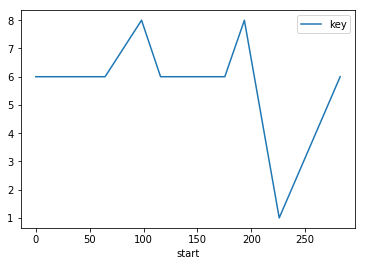

In [30]:
whitney_plot = whitney_confident.plot('start','key')

In [32]:
whitney_segments = pd.DataFrame(whitney_analysis['segments'])
whitney_segments

,confidence,duration,loudness_end,loudness_max,loudness_max_time,loudness_start,pitches,start,timbre
0,0.000,0.64644,NaN,-60.000,0.00000,-60.000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.00000,"[0.0, 171.13, 9.469, -28.48, 57.491, -50.067, ..."
1,1.000,0.14902,NaN,-12.073,0.04390,-60.000,"[1.0, 0.894, 0.073, 0.054, 0.125, 0.132, 0.262...",0.64644,"[29.482, 73.471, -54.033, -120.08, 12.64, 275...."
2,0.864,0.12231,NaN,-17.039,0.03687,-29.753,"[0.532, 1.0, 0.318, 0.278, 0.268, 0.328, 0.269...",0.79546,"[37.985, 105.028, 35.462, 66.054, 7.279, -23.3..."
3,0.738,0.25492,NaN,-17.170,0.03666,-28.437,"[0.811, 0.885, 0.864, 0.575, 0.669, 0.82, 0.70...",0.91778,"[34.761, 150.311, 92.339, 131.822, 56.826, -21..."
4,1.000,0.48748,NaN,-20.388,0.03813,-37.281,"[0.851, 0.631, 0.834, 0.776, 0.785, 0.646, 0.7...",1.17270,"[27.653, 178.174, 96.492, 244.686, 96.507, 12...."
5,1.000,0.26902,NaN,-11.552,0.01771,-56.767,"[0.677, 1.0, 0.653, 0.086, 0.072, 0.269, 0.263...",1.66018,"[35.315, 74.046, -118.993, 142.181, -56.381, -..."
6,1.000,0.12549,NaN,-15.498,0.00650,-42.798,"[0.192, 0.298, 0.1, 0.072, 0.029, 0.044, 0.054...",1.92921,"[35.007, 108.055, 98.948, 119.503, 100.358, -1..."
7,0.829,0.11655,NaN,-17.986,0.00864,-32.231,"[0.025, 0.171, 0.073, 0.044, 0.016, 0.024, 0.0...",2.05469,"[35.284, 150.653, 189.102, 110.417, 158.206, -..."
8,0.659,0.13932,NaN,-21.164,0.04861,-29.153,"[0.95, 0.622, 0.697, 0.751, 0.623, 0.75, 0.519...",2.17125,"[34.039, 175.519, 177.6, 84.066, 122.561, 2.49..."
9,0.777,0.24934,NaN,-17.114,0.00744,-31.021,"[0.075, 0.159, 0.13, 0.098, 0.078, 0.063, 0.07...",2.31057,"[34.403, 137.664, 172.697, 154.492, 145.47, -9..."
